In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
names = r"/content/drive/MyDrive/NLP/Project/names.txt"

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [4]:
# read in all the words
words = open(names, 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [20]:
# # build the dataset

# block_size = 3 # context length: how many characters do we take to predict the next one?
# X, Y = [], []
# for w in words:

#   #print(w)
#   context = [0] * block_size
#   for ch in w + '.':
#     ix = stoi[ch]
#     X.append(context)
#     Y.append(ix)
#     #print(''.join(itos[i] for i in context), '--->', itos[ix])
#     context = context[1:] + [ix] # crop and append

# X = torch.tensor(X)
# Y = torch.tensor(Y)

In [21]:
# X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [42]:
# build the dataset
block_size = 3 # context length: how many characters do we take to predict the next one?

def build_dataset(words):
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])


torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [ ]:
# C = torch.randn((27, 2))

In [ ]:
# emb = C[X]
# emb.shape

torch.Size([228146, 3, 2])

In [ ]:
# W1 = torch.randn((6, 100))
# b1 = torch.randn(100)

In [ ]:
# h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [ ]:
# h

tensor([[-1.0000,  0.8766, -0.4854,  ...,  1.0000, -0.1930, -0.9999],
        [-0.9999,  0.7718, -0.8556,  ...,  1.0000,  0.9999, -0.9991],
        [-0.2328,  0.8957, -0.2904,  ...,  0.9714,  1.0000, -0.9995],
        ...,
        [-1.0000, -0.5749,  0.9966,  ...,  0.7584, -0.9924, -0.9999],
        [-0.8289,  0.7501,  0.7784,  ...,  0.9999,  0.1704, -0.9945],
        [-1.0000,  0.9629,  0.9994,  ..., -0.9926,  0.5857, -0.9682]])

In [ ]:
# h.shape

torch.Size([228146, 100])

In [ ]:
# W2 = torch.randn((100, 27))
# b2 = torch.randn(27)

In [ ]:
# logits = h @ W2 + b2

In [ ]:
# logits.shape

torch.Size([228146, 27])

In [ ]:
# counts = logits.exp()

In [ ]:
# prob = counts / counts.sum(1, keepdims=True)

In [ ]:
# prob.shape

torch.Size([228146, 27])

In [ ]:
# Y.shape

torch.Size([228146])

In [ ]:
# loss = -prob[torch.arange(228146), Y].log().mean()
# loss

tensor(14.8316)

In [23]:
# code made more crispy

In [24]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [8]:
# 2 dimensional C architecture with 100 nodes
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [27]:
# 2 dimensional C architecture with 200 nodes
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [43]:
# 10 dimensional C architecture with 200 nodes
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [9]:
sum(p.nelement() for p in parameters) # number of parameters in total in 2d arch 100 nodes--> 3481

3481

In [28]:
sum(p.nelement() for p in parameters) # number of parameters in total in 2d arch 200 nodes--> 6881

6881

In [44]:
sum(p.nelement() for p in parameters) # number of parameters in total for 10D arch 200 nodes--> 11897

11897

In [45]:
for p in parameters:
  p.requires_grad = True

In [46]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [47]:
lri = []
lossi = []
stepi = []

In [32]:
# 2d arch training with 100/200 nodes:

for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

In [48]:
# 10d arch training with 200 nodes
for i in range(200000):

  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))

  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()

  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

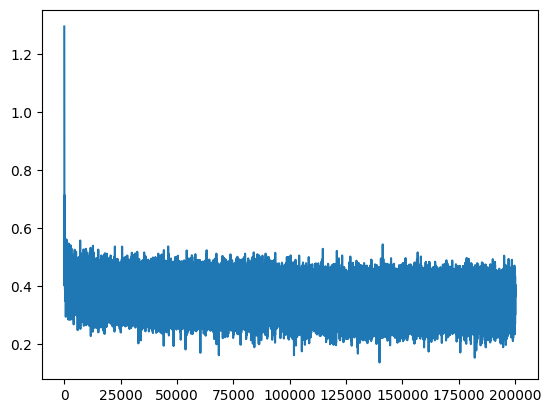

In [14]:
plt.plot(stepi, lossi) # for 2d 100 nodes

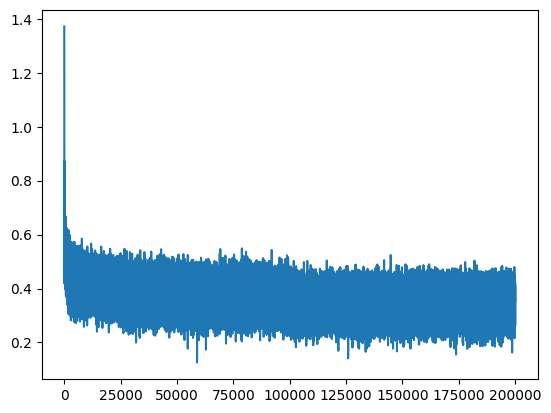

In [33]:
plt.plot(stepi, lossi) # for 2d 200 nodes

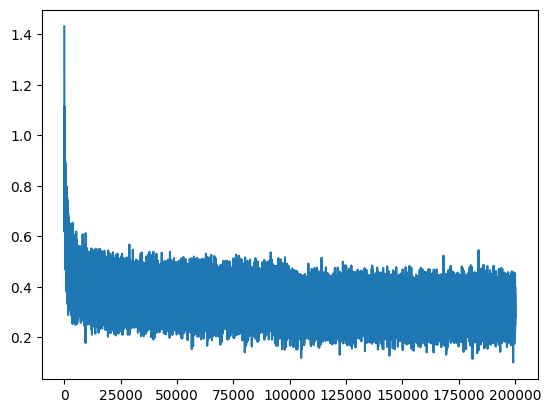

In [49]:
plt.plot(stepi, lossi) # for 10d 200 nodes

In [ ]:
# checking loss for 2D arch

In [34]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss #2.2527 #2.2261

tensor(2.2261, grad_fn=<NllLossBackward0>)

In [35]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss #2.2537 #2.2341

tensor(2.2341, grad_fn=<NllLossBackward0>)

In [44]:
# 2d arch 100 nodes
# First up we can see that with this implementation we have already surpassed the accuracy of our bigram model.
# We see above that the training loss (2.2527) and the developement loss (2.2537) is almost similar, it basically means that the has too less of a parameter.
# and the model will benefit with icreasing the number of parameters.
# so we increase the number of nodes from 100 to 200 in the hidden layer

In [41]:
# 2d arch 200 nodes
# On increasing the number of nodes in the hidden layer from 100 nodes to 200 nodes
# we see training loss decreasing to 2.2261 from 2.2527
# and dev loss decreasing to 2.2341 from 2.2537
# One more thing to notice is that the two losses are now going apart from each other unlike in the previous case.
# this means model is slowly starting to overfit so we will stop increasing number of nodes.
# now the constraint in our model maybe the dimension of our embedding space. Maybe we are trying to cram too
# many characters in 2-dimensions so we will increase the number of dimensions to 10.

In [ ]:
# 10d arch and 200 nodes


In [ ]:
# checking loss for 10D arch

In [50]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss #2.1226

tensor(2.1226, grad_fn=<NllLossBackward0>)

In [51]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss #2.1791

tensor(2.1791, grad_fn=<NllLossBackward0>)

In [59]:
# As mentioned earlier we can see that on increasing the dimensionality of the embedding space we were able to decrease our
# training loss to 2.1226 from 2.2261 and
# dev loss to 2.1791 from 2.2341

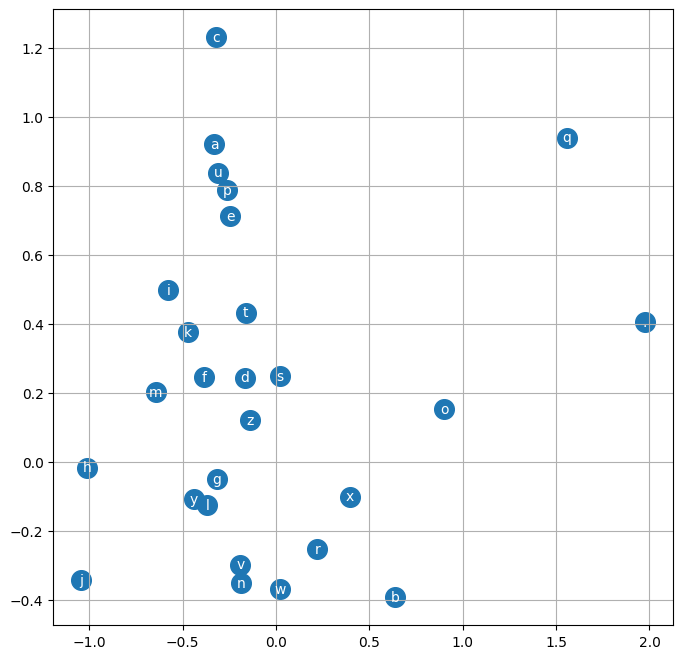

In [52]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters only for 2d
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [37]:
# training split, dev/validation split, test split
# 80%, 10%, 10%

In [56]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [58]:


# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break

    print(''.join(itos[i] for i in out))

mona.
mayah.
keer.
nihayla.
remyrsleydrami.
azeredielin.
shi.
jenleigh.
esmana.
lelyzion.
kamin.
shabnrgyliniel.
kendretlynn.
novanfi.
brey.
dariyah.
fael.
yuma.
misklynn.
hal.


In [36]:
# unique names generated by the 2D architecture 100 nodes

# mora.
# amyannieel.
# ndhryal.
# rethrucejdrari.
# aderedielin.
# shy.
# jelle.
# elies.
# anar.
# kayzion.
# karin.
# shubergshiriel.
# kin.
# reteliph.
# thana.
# uba.
# ged.
# ruyahleyeh.
# yoma.
# mystolen.

# mora.
# mayah.
# seel.
# nihahalarethastendrlee.
# adered.
# elie.
# shi.
# jen.
# edelieso.
# narleiyah.
# hokelin.
# shub.
# rishiriel.
# kin.
# renelipanteroni.
# bemyed.
# ryy.
# julynn.
# yuma.
# mystolan.

In [36]:
# unique names generated by the 2D architecture 200 nodes

# mora.
# mayah.
# seel.
# nichyla.
# rethan.
# endra.
# gra.
# ched.
# eliah.
# milopaleigh.
# cananar.
# kayzioh.
# kalin.
# shabergshiriel.
# kin.
# reelynn.
# nopulan.
# breyce.
# ryyah.
# fael.

In [ ]:
# unique names generated by the 10D architecture 200 nodes

# mona.
# mayah.
# keer.
# nihayla.
# remyrsleydrami.
# azeredielin.
# shi.
# jenleigh.
# esmana.
# lelyzion.
# kamin.
# shabnrgyliniel.
# kendretlynn.
# novanfi.
# brey.
# dariyah.
# fael.
# yuma.
# misklynn.
# hal.